<a href="https://colab.research.google.com/github/Hrita0910/Project_Fraud-Detection/blob/main/Fraud_Detection_in_Financial_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Fraud Detection in Financial Transactions:**

###**Problem Statement:**

Financial institutions face challenges in detecting and preventing fraudulent transactions, which can result in significant financial losses. Develop a machine learning model that analyzes transaction patterns and user behaviors to detect and flag potentially fraudulent activities in real-time.


###**Objective:**

Enhance the security of financial transactions by providing an advanced fraud detection system that identifies suspicious activities quickly and accurately.

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
#Importing dataset
df = pd.read_csv('/content/gdrive/My Drive/FinancialTransaction.csv')

## Data Analysis

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.tail(6)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
df["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [ ]:
customer = df[["nameOrig","amount","nameDest"]][df.amount==df["amount"].max()]
customer

,nameOrig,amount,nameDest
3686583,C1715283297,92445516.64,C439737079


In [ ]:
customer1 = df[["oldbalanceOrg","amount","newbalanceOrig","isFraud"]][df.amount==df["amount"].max()]
customer1

,oldbalanceOrg,amount,newbalanceOrig,isFraud
3686583,0.0,92445516.64,0.0,0


In [ ]:
customer.merge(customer1,on="amount")

,nameOrig,amount,nameDest,oldbalanceOrg,newbalanceOrig,isFraud
0,C1715283297,92445516.64,C439737079,0.0,0.0,0


In [ ]:
df["amount"].mean()

179861.90354913071

In [ ]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [ ]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.groupby("isFraud")["amount"].sum()

isFraud
0    1.132337e+12
1    1.205642e+10
Name: amount, dtype: float64

In [27]:
name_fraud = df[(df['isFraud']==1) & (df['type']=='TRANSFER')]
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

## Data Visualization

In [5]:
af = df[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest", "isFraud", "isFlaggedFraud"]]
af.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,181.00,181.0,0.00,0.0,0.0,1,0
3,181.00,181.0,0.00,21182.0,0.0,1,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [20]:
af.corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


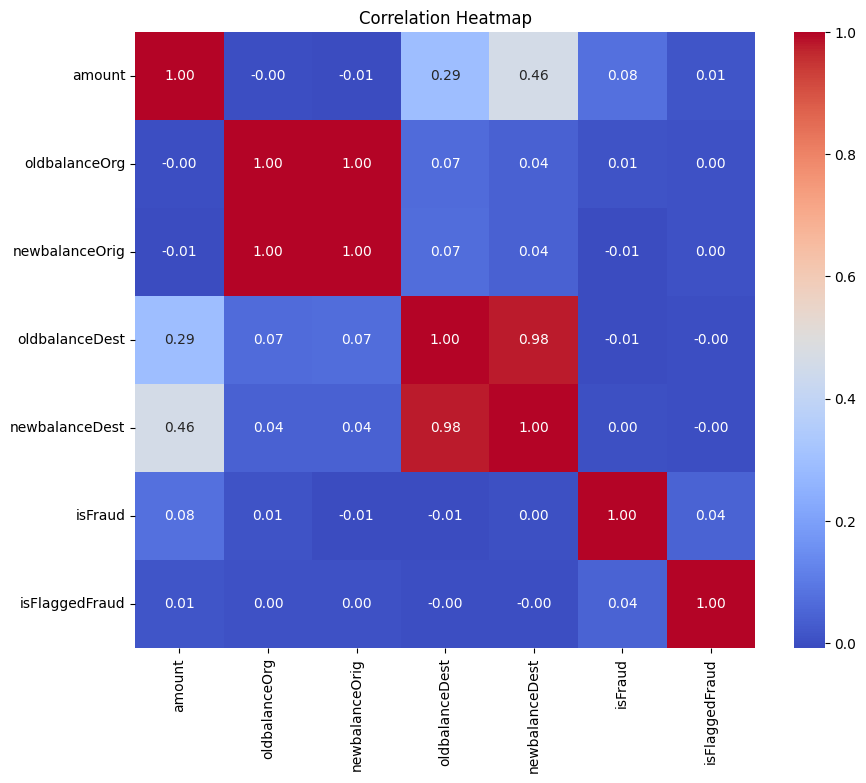

In [ ]:
plt.style.use('default')
plt.figure(figsize=(10, 8))
sns.heatmap(af.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

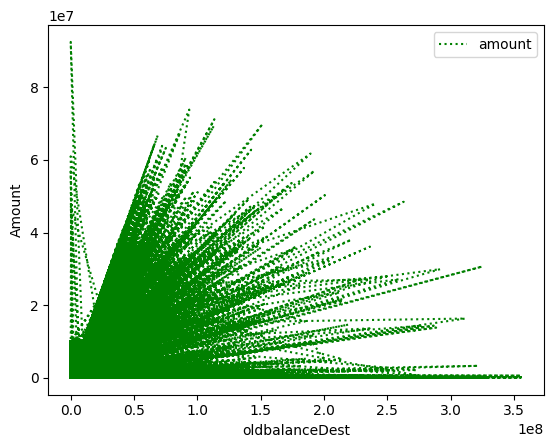

In [7]:
af.plot(x="oldbalanceDest",y="amount",style=":", color ="green")
plt.xlabel("oldbalanceDest")
plt.ylabel("Amount")
plt.show()

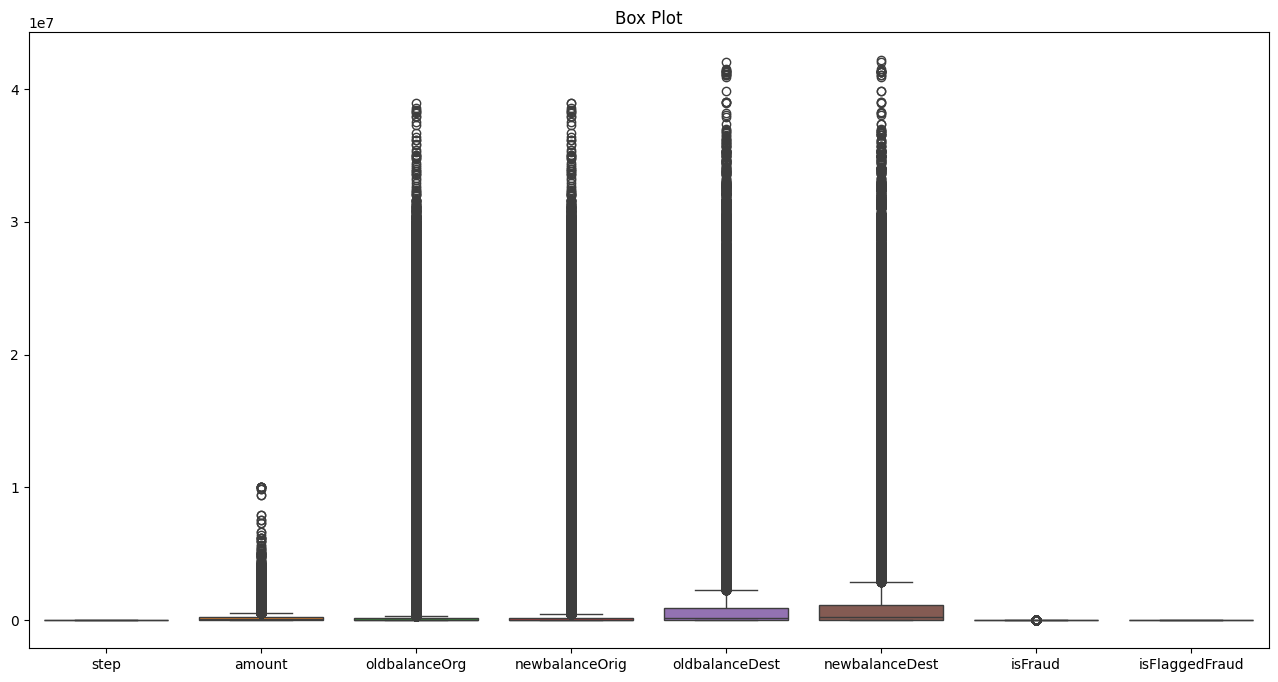

In [5]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df[:1000000])
plt.title('Box Plot')
plt.show()

<ipython-input-39-349c220b1dc6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='hls')


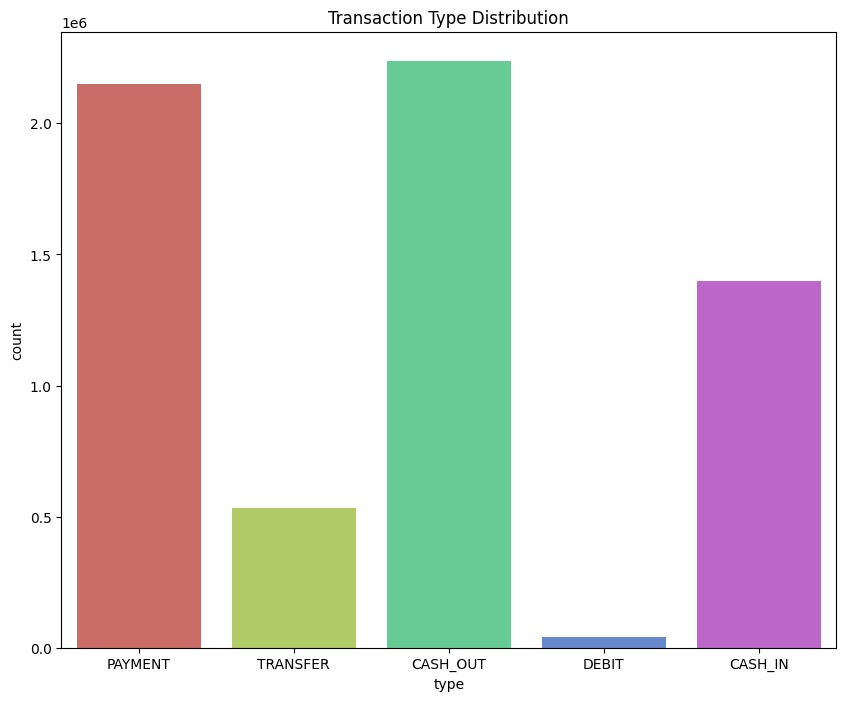

In [39]:
%matplotlib inline
plt.figure(figsize=(10, 8))
sns.countplot(x='type', data=df, palette='hls')
plt.title('Transaction Type Distribution')
plt.show()

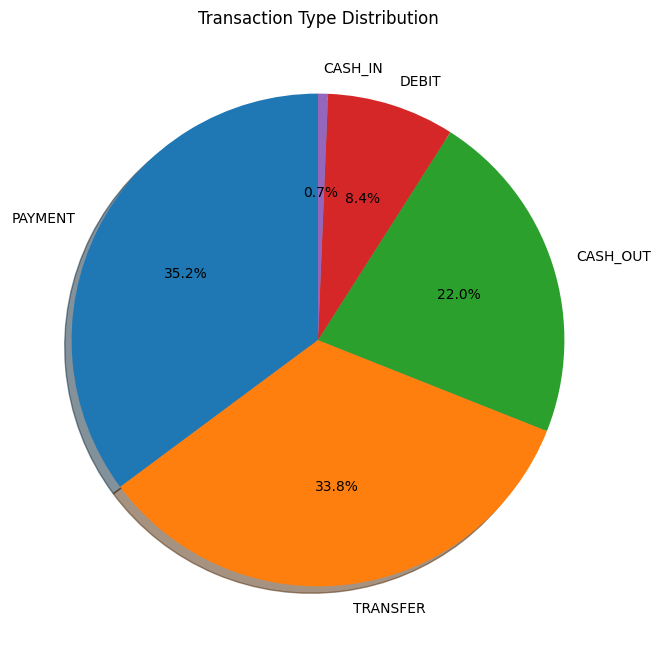

In [36]:
plt.figure(figsize=(10, 8))
plt.pie(df['type'].value_counts(), labels=df['type'].unique(), autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Transaction Type Distribution')
plt.show()

<ipython-input-10-2ccefcfd11e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'isFraud', y = 'step', data = df,palette="hls")
<ipython-input-10-2ccefcfd11e3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'isFraud', y = 'amount', data = df,palette="hls")
<ipython-input-10-2ccefcfd11e3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = df,palette="hls")
<ipython-input-10-2ccefcfd11e3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14

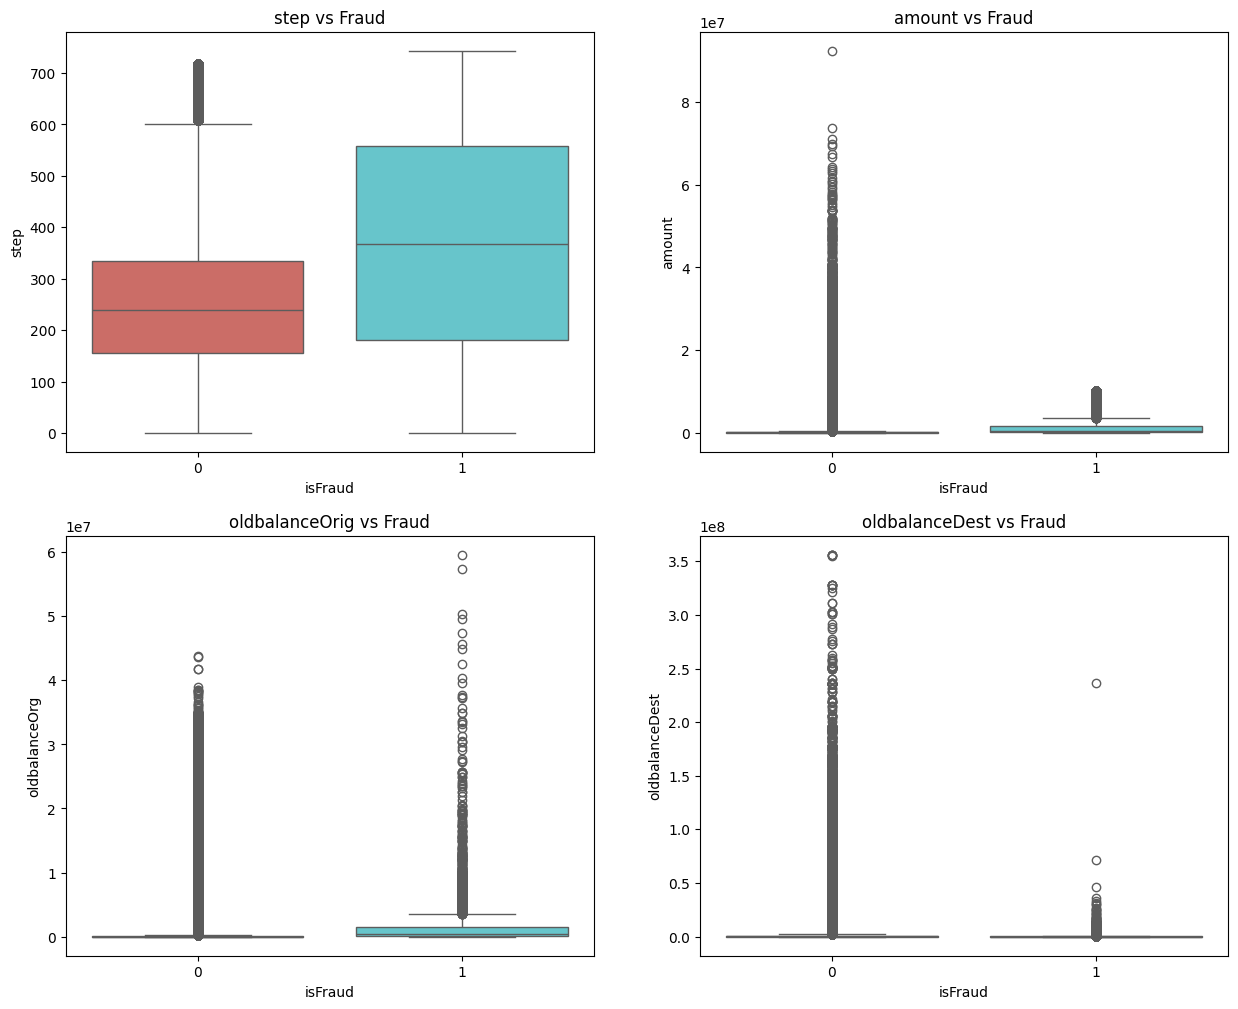

In [10]:
plt.figure(figsize=(15, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'isFraud', y = 'step', data = df,palette="hls")
plt.title('step vs Fraud')
plt.subplot(2,2,2)
sns.boxplot(x = 'isFraud', y = 'amount', data = df,palette="hls")
plt.title('amount vs Fraud')
plt.subplot(2,2,3)
sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = df,palette="hls")
plt.title('oldbalanceOrig vs Fraud')
plt.subplot(2,2,4)
sns.boxplot(x = 'isFraud', y = 'oldbalanceDest', data = df,palette="hls")
plt.title('oldbalanceDest vs Fraud')
plt.show()

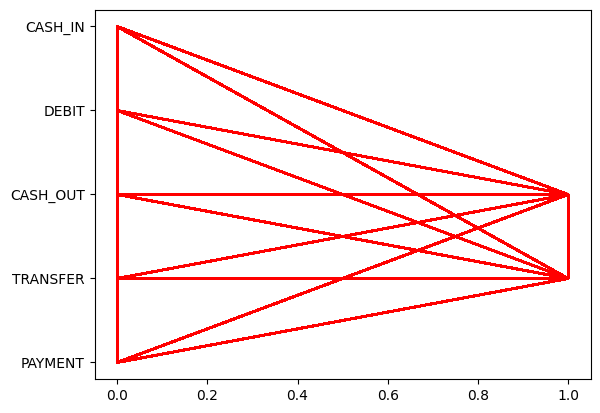

In [37]:
plt.plot(df["isFraud"],df["type"],color="red")
plt.show()

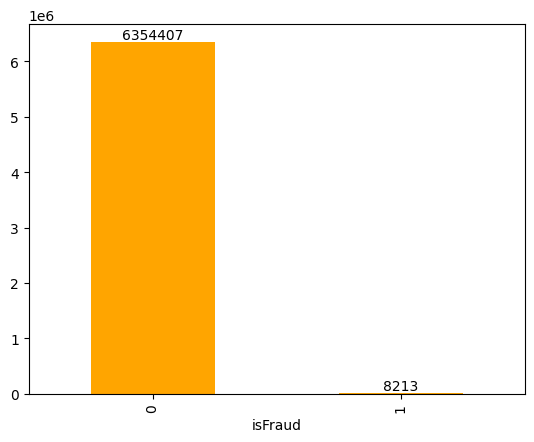

In [5]:
y = df['isFraud'].value_counts()
for i, count in enumerate(y):
    plt.text(i, count + 100, str(count), ha='center', va='bottom')
y.plot(kind='bar', color='orange')
plt.show()

## Data Preprocessing

In [6]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
df.drop(columns=["nameOrig","nameDest","isFlaggedFraud","step"],inplace=True)
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [13]:
df.index

RangeIndex(start=0, stop=6362620, step=1)

In [14]:
df.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

## Split into features(x) and target(y) label sets

In [8]:
x = pd.DataFrame(df.iloc[:,:-1])
y = pd.DataFrame(df.iloc[:,-1])

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=251)

In [36]:
x.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,3,9839.64,170136.0,160296.36,0.0,0.0
1,3,1864.28,21249.0,19384.72,0.0,0.0
2,4,181.00,181.0,0.00,0.0,0.0
3,1,181.00,181.0,0.00,21182.0,0.0
4,3,11668.14,41554.0,29885.86,0.0,0.0


In [37]:
y.head()

,isFraud
0,0
1,0
2,1
3,1
4,0


In [22]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (5090096, 6)
x_test shape (1272524, 6)
y_train shape (5090096, 1)
y_test shape (1272524, 1)


## Normalization

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [11]:
x_train = sc.fit_transform(x_train)

In [12]:
x_test = sc.transform(x_test)

## Training and Evaluation of the model

In [41]:
#Logisitic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [44]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [48]:
print("Accuracy Score",accuracy_score(y_test,y_pred))

Accuracy Score 0.9992259478013774


In [56]:
#Confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1270885      84]
 [    901     654]]


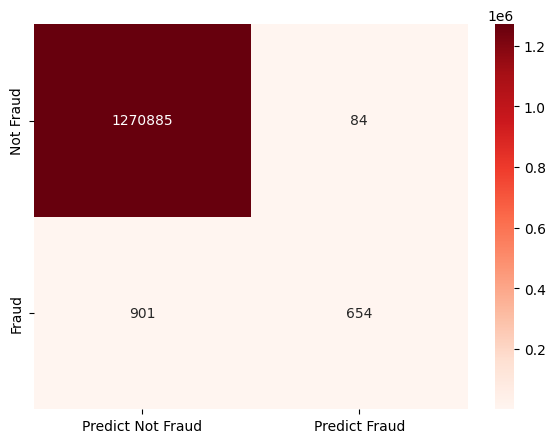

In [64]:
cm = confusion_matrix(y_test,y_pred,labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Not Fraud","Fraud"]],
                  columns = [i for i in ["Predict Not Fraud","Predict Fraud"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,cmap="Reds",fmt="d")
plt.show()

0 - Not-Fraud


1 - Fraud


In [60]:
print("Classification Report of LogisticRegression Model: \n")
print(classification_report(y_test,y_pred))

Classification Report of LogisticRegression Model: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270969
           1       0.89      0.42      0.57      1555

    accuracy                           1.00   1272524
   macro avg       0.94      0.71      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



In [67]:
y_pred_proba = lr.predict_proba(x_test)[:,1]
y_pred_proba

array([3.31842410e-04, 1.58309192e-04, 3.38183912e-05, ...,
       2.59880421e-05, 9.74552817e-04, 8.75827533e-04])

In [68]:
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred_proba))

ROC AUC Score:  0.9659966504175678


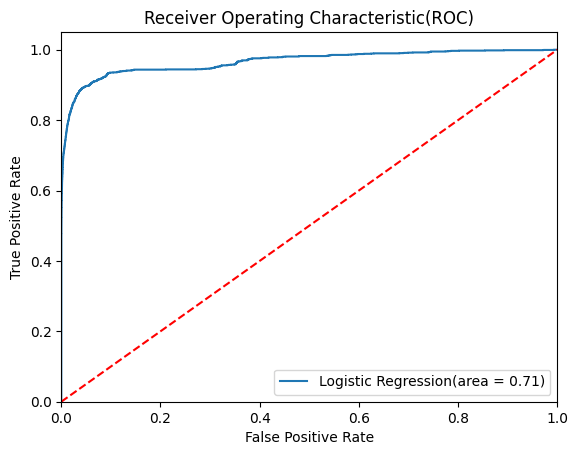

In [65]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds = roc_curve(y_test,lr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="Logistic Regression(area = %0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic(ROC)")
plt.legend(loc="lower right")
plt.show()

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [14]:
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
print("Accuracy Score",accuracy_score(y_test,y_pred))

Accuracy Score 0.9997446020664443


In [18]:
#Confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1270813     156]
 [    169    1386]]


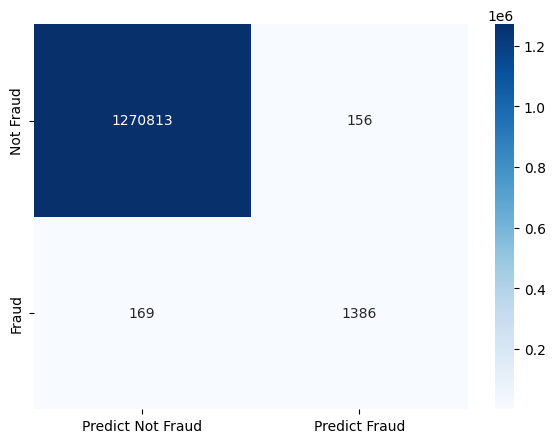

In [20]:
cm = confusion_matrix(y_test,y_pred,labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Not Fraud","Fraud"]],
                  columns = [i for i in ["Predict Not Fraud","Predict Fraud"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,cmap="Blues",fmt="d")
plt.show()

In [21]:
print("Classification Report of DecisionTreeClassifier Model: \n")
print(classification_report(y_test,y_pred))

Classification Report of DecisionTreeClassifier Model: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270969
           1       0.90      0.89      0.90      1555

    accuracy                           1.00   1272524
   macro avg       0.95      0.95      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524



In [23]:
y_pred_proba = dt.predict_proba(x_test)[:,1]
y_pred_proba

array([0., 0., 0., ..., 0., 0., 0.])

In [24]:
print("ROC AUC Score: ",roc_auc_score(y_test,y_pred_proba))

ROC AUC Score:  0.9455977934895101


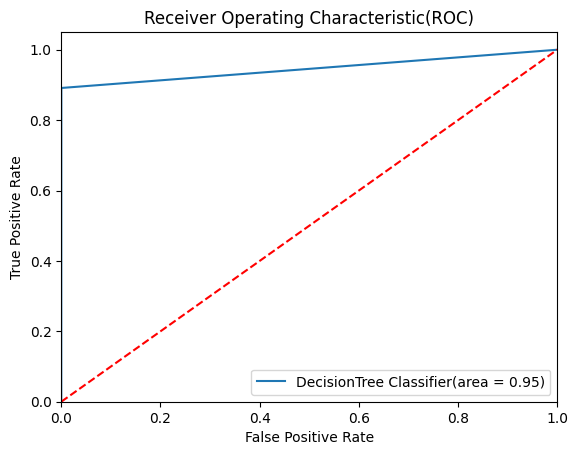

In [25]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds = roc_curve(y_test,dt.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="DecisionTree Classifier(area = %0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic(ROC)")
plt.legend(loc="lower right")
plt.show()

## The models and their corresponding performance metrics are as follows:

### **Logistic Regression:**

Confusion Matrix: 1270885 true positives(TP), 84 false positives(FT), 901 false negatives(FN) and 654 true negatives(TN).

Precision for class 1: 0.90

Recall for class 1: 0.42

F1 score for class 1: 0.57

Accuracy: 0.99922(approx 99.92%)

AUC Score: 0.96

### **Decision Tree:**

Confusion Matrix: 1270813 true positives(TP), 156 false positives(FT), 169 false negatives(FN) and 1386 true negatives(TN).

Precision for class 1: 0.90.

Recall for class 1: 0.89

F1-Score for class 1: 0.90

Accuracy: 0.99974(approx 99.97%).

AUC Score: 0.94


## When choosing a model for a dataset that is large and imbalanced, several factors need to be considered:

**Precision and Recall**: In the context of fraud detection, recall may often be more important than precision as it is crucial to identify as many fraudulent transactions as possible (i.e., a higher recall for class 1 means fewer fraudulent transactions go undetected).

**AUC Score:** A higher AUC score indicates a better performance of the model in distinguishing between the positive and negative class across all thresholds.

Considering the metrics, the Decision Tree has a better recall than Logistic Regression (0.90 vs. 0.42) but Logistic Regression has a higher AUC score than Decision Tree (0.96 vs. 0.94), suggesting it is better at identifying positive cases (fraudulent transactions). However, the difference in recall scores is quite marginal, and also the accuracy of Decision Tree is slightly better than Logistic Regression, hence in this case we should use Decision Tree model for evaluation.